# Enrolments Data

## Exploration
### Statistical exploration

#### Reading the data, removing useless columns and adding special columns

In [1]:
import pandas as pd
import numpy as np
#Read the data
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-06-27T1636.csv")

In [2]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type', 'LclPrice',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'CanceledDate', 'Email', 'ExpectedPayment',
       'InvoiceAmountLcl', 'ApplicationType', 'PardotCategory', 'Status',
       'Email.1', 'LeadID', 'OppCreatedDate', 'OppOwnerMetro', 'OppOwnerEmail',
       'PhoneValid', 'SpeedtoLead', 'CampaignSource', 'CampaignSourceCategory',
       'InstanceID'],
      dtype='object')

In [3]:
enrolments.PhoneValid.unique()
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})
#Remove some useless columns
enrolments.drop('LclPrice', axis=1, inplace=True)
enrolments.drop('Email', axis=1, inplace=True)
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppOwnerEmail', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.drop('InvoiceAmountLcl', axis=1, inplace=True)
enrolments.drop('Email.1', axis=1, inplace=True)
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'CanceledDate', 'ExpectedPayment', 'ApplicationType',
       'PardotCategory', 'LeadID', 'PhoneValid', 'SpeedtoLead', 'InstanceID'],
      dtype='object')

In [4]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.notnull()

In [5]:
enrolments.drop('CanceledDate', axis=1, inplace=True)
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'ExpectedPayment', 'ApplicationType', 'PardotCategory',
       'LeadID', 'PhoneValid', 'SpeedtoLead', 'InstanceID', 'Cancelled'],
      dtype='object')

In [6]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])
enrolments.APAC.value_counts()

False    31547
True      5999
Name: APAC, dtype: int64

In [7]:
#Limit to only post mid-2014 data
enrolments = enrolments[enrolments.Startdate > 20140630]

In [8]:
#Checkout all the numeric columns
#enrolments.info()
#enrolments.describe()
enrolments.shape

(37505, 19)

In [9]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37505 entries, 0 to 37504
Data columns (total 19 columns):
Startdate               37505 non-null int64
Enddate                 37505 non-null int64
Price                   37505 non-null int64
Metro                   37505 non-null object
Course                  37505 non-null object
Type                    37505 non-null object
DaysEnroltoStartdate    34276 non-null float64
DaysInvoicetoEnrol      37505 non-null int64
DaysLeadtoEnroled       37505 non-null int64
EnrolDate               37505 non-null int64
ExpectedPayment         35761 non-null object
ApplicationType         37505 non-null object
PardotCategory          36523 non-null object
LeadID                  37505 non-null int64
PhoneValid              37505 non-null int64
SpeedtoLead             12643 non-null float64
InstanceID              37505 non-null int64
Cancelled               37505 non-null bool
APAC                    37505 non-null bool
dtypes: bool(2), float64(2),

#### Dealing with null values

In [10]:
enrolments.isnull().sum()

Startdate                   0
Enddate                     0
Price                       0
Metro                       0
Course                      0
Type                        0
DaysEnroltoStartdate     3229
DaysInvoicetoEnrol          0
DaysLeadtoEnroled           0
EnrolDate                   0
ExpectedPayment          1744
ApplicationType             0
PardotCategory            982
LeadID                      0
PhoneValid                  0
SpeedtoLead             24862
InstanceID                  0
Cancelled                   0
APAC                        0
dtype: int64

In [11]:
enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.ExpectedPayment.value_counts()

Student / Self                28253
Employer                       3832
Loan Partner                   2699
Unknown                        1744
Veterans Affairs                291
Scholarship                     262
Other                           143
Family                           90
GA Employee/Instructor           75
Loan (Private)                   60
Government Funding / Grant       56
Name: ExpectedPayment, dtype: int64

In [12]:
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.PardotCategory.value_counts()

GA Course Leads                17758
Website                         5743
CWE Purchase                    4557
Facebook Acquisition            1609
GA Dash                         1368
Sweepstake                      1204
Other                           1078
Unknown                          995
Partner Event                    466
GA Front Row Signup              388
GA Circuits Leads                377
Twitter Promoted                 370
Student Enrollment               197
Twitter Acquisition              190
Uncategorized                    186
Content Partnership              150
Livestream Purchase              117
Scholarship                      117
Partner Livestream               105
CWE Walk Ins                     102
Global Acquisition Campaign       78
Free Front Row Trial Local        54
GA Content                        52
Social Organic                    39
GA Event                          34
LinkedIn Acquisition              32
GA Blog                           32
L

In [13]:
#enrolments.DaysEnroltoStartdate.mean()
enrolments.DaysEnroltoStartdate.fillna(enrolments.DaysEnroltoStartdate.mean(), inplace=True)

In [14]:
#enrolments.SpeedtoLead.value_counts()
enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [15]:
enrolments.isnull().sum()

Startdate               0
Enddate                 0
Price                   0
Metro                   0
Course                  0
Type                    0
DaysEnroltoStartdate    0
DaysInvoicetoEnrol      0
DaysLeadtoEnroled       0
EnrolDate               0
ExpectedPayment         0
ApplicationType         0
PardotCategory          0
LeadID                  0
PhoneValid              0
SpeedtoLead             0
InstanceID              0
Cancelled               0
APAC                    0
dtype: int64

#### Streamlining multiple categories

In [ ]:
#Checkout only the more common application types
#enrolments.ApplicationType.value_counts()<100

In [16]:
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
commonapptypes

Index(['apply now', 'request info', 'info session', 'referral',
       'contact_admissions', 'financing contact us', 'get notified',
       'cwe_feedback', 'trial class', 'lander', 'open house'],
      dtype='object')

In [17]:
enrolments = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
enrolments.shape

(35957, 19)

In [18]:
enrolments.ApplicationType.value_counts()

apply now               12684
request info            12329
info session             7258
referral                 1141
contact_admissions        536
financing contact us      506
get notified              498
cwe_feedback              346
trial class               273
lander                    206
open house                180
Name: ApplicationType, dtype: int64

In [19]:
#Checkout only the more common Pardot types
#enrolments.PardotCategory.value_counts()>100
commonpdtypes = enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100]
commonpdtypes

Index(['GA Course Leads', 'Website', 'CWE Purchase', 'Facebook Acquisition',
       'GA Dash', 'Sweepstake', 'Other', 'Unknown', 'Partner Event',
       'GA Front Row Signup', 'Twitter Promoted', 'GA Circuits Leads',
       'Uncategorized', 'Twitter Acquisition', 'Student Enrollment',
       'Content Partnership', 'Livestream Purchase'],
      dtype='object')

In [20]:
enrolments = enrolments[enrolments.PardotCategory.isin(commonpdtypes)]
enrolments.shape

(35282, 19)

In [21]:
enrolments.PardotCategory.value_counts()

GA Course Leads         17319
Website                  5514
CWE Purchase             4307
Facebook Acquisition     1551
GA Dash                  1273
Sweepstake               1149
Other                    1011
Unknown                   891
Partner Event             434
GA Front Row Signup       375
Twitter Promoted          352
GA Circuits Leads         318
Uncategorized             183
Twitter Acquisition       182
Student Enrollment        172
Content Partnership       139
Livestream Purchase       112
Name: PardotCategory, dtype: int64

In [22]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35282 entries, 0 to 37504
Data columns (total 19 columns):
Startdate               35282 non-null int64
Enddate                 35282 non-null int64
Price                   35282 non-null int64
Metro                   35282 non-null object
Course                  35282 non-null object
Type                    35282 non-null object
DaysEnroltoStartdate    35282 non-null float64
DaysInvoicetoEnrol      35282 non-null int64
DaysLeadtoEnroled       35282 non-null int64
EnrolDate               35282 non-null int64
ExpectedPayment         35282 non-null object
ApplicationType         35282 non-null object
PardotCategory          35282 non-null object
LeadID                  35282 non-null int64
PhoneValid              35282 non-null int64
SpeedtoLead             35282 non-null float64
InstanceID              35282 non-null int64
Cancelled               35282 non-null bool
APAC                    35282 non-null bool
dtypes: bool(2), float64(2),

In [23]:
enrolments.Cancelled.value_counts()

False    29019
True      6263
Name: Cancelled, dtype: int64

#### Pandas profile

In [ ]:
#!pip install pandas-profiling

In [ ]:
#import pandas_profiling
#apandas_profiling.ProfileReport(enrolments)

### Visualisation

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
enrolments['DaysInvoicetoEnrol'].hist()

In [ ]:
enrolments['DaysEnroltoStartdate'].hist()

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x='Course', y = 'Cancelled', data = enrolments)

In [ ]:
sns.jointplot(x='DaysEnroltoStartdate', y="DaysInvoicetoEnrol", data=enrolments)

In [ ]:
corr = enrolments.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

## Running dummy data
- These columns have text outputs:
 - Metro: 35282 non-null object
 - Course: 35282 non-null object
 - Type: 35282 non-null object
 - ExpectedPayment: 35282 non-null object
 - ApplicationType: 35282 non-null object
 - PardotCategory: 35282 non-null object

In [24]:
dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory'] )

In [25]:
dummydata.columns

Index(['Startdate', 'Enddate', 'Price', 'DaysEnroltoStartdate',
       'DaysInvoicetoEnrol', 'DaysLeadtoEnroled', 'EnrolDate', 'LeadID',
       'PhoneValid', 'SpeedtoLead',
       ...
       'PardotCategory_Livestream Purchase', 'PardotCategory_Other',
       'PardotCategory_Partner Event', 'PardotCategory_Student Enrollment',
       'PardotCategory_Sweepstake', 'PardotCategory_Twitter Acquisition',
       'PardotCategory_Twitter Promoted', 'PardotCategory_Uncategorized',
       'PardotCategory_Unknown', 'PardotCategory_Website'],
      dtype='object', length=101)

In [26]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Price', 'Metro', 'Course', 'Type',
       'DaysEnroltoStartdate', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'ExpectedPayment', 'ApplicationType', 'PardotCategory',
       'LeadID', 'PhoneValid', 'SpeedtoLead', 'InstanceID', 'Cancelled',
       'APAC'],
      dtype='object')

## Let's try some algorithms!

### Decision Tree

In [ ]:
dummydata.Cancelled.value_counts()

In [ ]:
treesubset = dummydata

In [ ]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

cancelled = treesubset['Cancelled']
del treesubset['Cancelled']
treesubset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(treesubset, cancelled, random_state=1)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()
features

In [ ]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

#### Previously exported: 
<img src="decisiontree-enrolments.png">

### Logistic Regression

In [56]:
import pandas as pd
# data = dummydata
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')

In [57]:
X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [58]:
#split the data
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [59]:
#test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.822582473642


In [60]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

0.822582473642


In [61]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

[ 0.82232927  0.82232927  0.82232927  0.82256236  0.82256236  0.82256236
  0.82256236  0.82256236  0.82256236  0.82251205]


In [62]:
print(scores.mean())

0.822487401481


In [63]:
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[7256    0]
 [1565    0]]


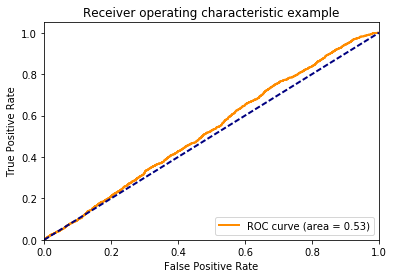

In [64]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

### Regression 

In [65]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

RMSE (No reg.) = 0.421209599081


/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py:232: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [66]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)
# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  0.001
RMSE (Ridge CV reg.) = 0.377489495641


In [67]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  0.0001
RMSE (Lasso CV reg.) = 0.381145066437


In [68]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)
enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Optimal Alpha Value:  100.0
RMSE (ENET CV reg.) 0.382021679716


### KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.797641990704


### Random Forrest

In [72]:
#all_ftcolumns

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1)
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)
rfclf.oob_score_

0.84397143019103227

In [74]:
pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})

,feature,importance
0,Startdate,0.066676
1,Enddate,0.067371
2,Price,0.024936
3,DaysEnroltoStartdate,0.178228
4,DaysInvoicetoEnrol,0.031645
5,DaysLeadtoEnroled,0.090088
6,EnrolDate,0.091128
7,LeadID,0.094869
8,PhoneValid,0.008769
9,SpeedtoLead,0.037246


## Parameter tuning?